<a href="https://colab.research.google.com/github/fabiozacavn/fabiozacavn.github.io/blob/main/Fabio_Zac%C3%A0_2025_04_11_new_machine_learning_02_selfwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prima impostazione
Importa qui le librerie

In [ ]:
# Scrivi qui il tuo codice


# Traccia 1 - Implementazione Base di Regressione Lineare
## Obiettivo:
Implementare un modello di regressione lineare per prevedere un valore numerico continuo a partire da un dataset di esempio.

## To-do:
1. Carica un dataset e separalo in feature (`x`) e target (`y`)
2. Suddividi il dataset in training e test set (80%-20%)
3. Applica una regressione lineare
4. Valuta il modello usando MSE e R^2 score

## Rispondi a:
1. Come cambia la performance se modifichi la percentuale di training e test set?
2. Se il valore di R^2 e' negativo, cosa vuol dire?
3. Quali ipotesi fa la regressione lineare sui dati?

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Caricamento dataset
df = pd.read_csv("2025-04-11-dataset-insurancecsv-new.csv")  # NESSUN /mnt/data/

# 2. Rimuovi 'index' se presente
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# 3. One-hot encoding per variabili categoriche
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Separazione feature (X) e target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 5. Train-test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predizione e valutazione
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 8. Stampa risultati
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 33596915.85136145
R² Score: 0.7835929767120724


**Scrivi qui le tue risposte alle domande**

1. Come cambia la performance se modifichi la percentuale di training e test set?
La divisione tra training set e test set influenza direttamente la capacità del modello di apprendere e la validità della valutazione delle sue prestazioni.

Se aumenti la percentuale del training set (ad esempio 90% training e 10% test), il modello ha più dati per apprendere. Questo può migliorare l’addestramento, ma riduce la dimensione del test set, rendendo meno affidabile la valutazione delle prestazioni.

Se riduci la percentuale del training set (ad esempio 60% training e 40% test), il modello ha meno dati su cui imparare. Questo può causare un peggioramento dell’accuratezza e un aumento dell’errore. Tuttavia, il test set più ampio fornisce una valutazione più robusta.

Una divisione equilibrata come 80% training e 20% test è comunemente usata perché rappresenta un buon compromesso tra apprendimento efficace e valutazione significativa.

In generale, una modifica della percentuale può cambiare i valori del Mean Squared Error (MSE) e del R² score, e può aiutare a evidenziare se il modello è stabile o sensibile ai cambiamenti nei dati.

2. Se il valore di R² è negativo, cosa vuol dire?
Il coefficiente R² misura la proporzione della varianza del target spiegata dal modello. Il suo valore teorico è compreso tra 0 e 1, ma può anche essere negativo.

Un valore negativo di R² indica che il modello è peggiore di un modello "naïve" che si limita a predire sempre la media dei valori di y. In altre parole, il modello non solo non spiega alcuna varianza nei dati, ma introduce errori peggiori rispetto a una previsione banale.

Questo accade tipicamente quando:

Il modello è addestrato su dati che non contengono una relazione lineare.

Il modello è applicato su dati molto diversi rispetto a quelli di addestramento.

Le feature non hanno potere predittivo significativo.

3. Quali ipotesi fa la regressione lineare sui dati?
La regressione lineare si basa su alcune ipotesi fondamentali che devono essere rispettate affinché i risultati siano validi:

Linearità: Si assume che esista una relazione lineare tra le variabili indipendenti e la variabile dipendente.

Indipendenza degli errori: Gli errori (residui) devono essere indipendenti tra loro. Questa ipotesi è particolarmente importante per dati temporali o sequenziali.

Omocedasticità: Gli errori devono avere varianza costante in tutto il range dei valori delle variabili indipendenti. In presenza di eterocedasticità, il modello può risultare distorto.

Normalità degli errori: Gli errori devono essere distribuiti normalmente. Questa ipotesi è necessaria per costruire intervalli di confidenza e per effettuare test di significatività sui coefficienti.

Assenza di multicollinearità: Le variabili indipendenti non devono essere fortemente correlate tra loro. La multicollinearità può rendere instabili le stime dei coefficienti.

Queste ipotesi possono essere verificate con analisi diagnostiche come i grafici dei residui, il test di Durbin-Watson, il test di Breusch-Pagan, o il calcolo del VIF (Variance Inflation Factor) per la multicollinearità.



---
# Traccia 2 - Regression Tree: Modello e Interpretazione
## Obiettivo:
Utilizzare un albero di regressione per modellare una relazione non lineare tra variabili.

## To-do:
1. Applicare un Decision Tree Regressor e impostare una profondità massima arbitraria.
2. Visualizzare l’albero di decisione usando plot_tree().
3. Valutare le prestazioni rispetto a una regressione lineare.
4. Esplorare l’overfitting aumentando la profondità dell’albero.

## Domande di Riflessione:
1. Come cambia l’errore al variare della profondità dell’albero?
2. Quando ha senso usare un albero rispetto a una regressione lineare?
3. Quali sono i vantaggi e gli svantaggi dell’interpolazione dei dati con un albero?

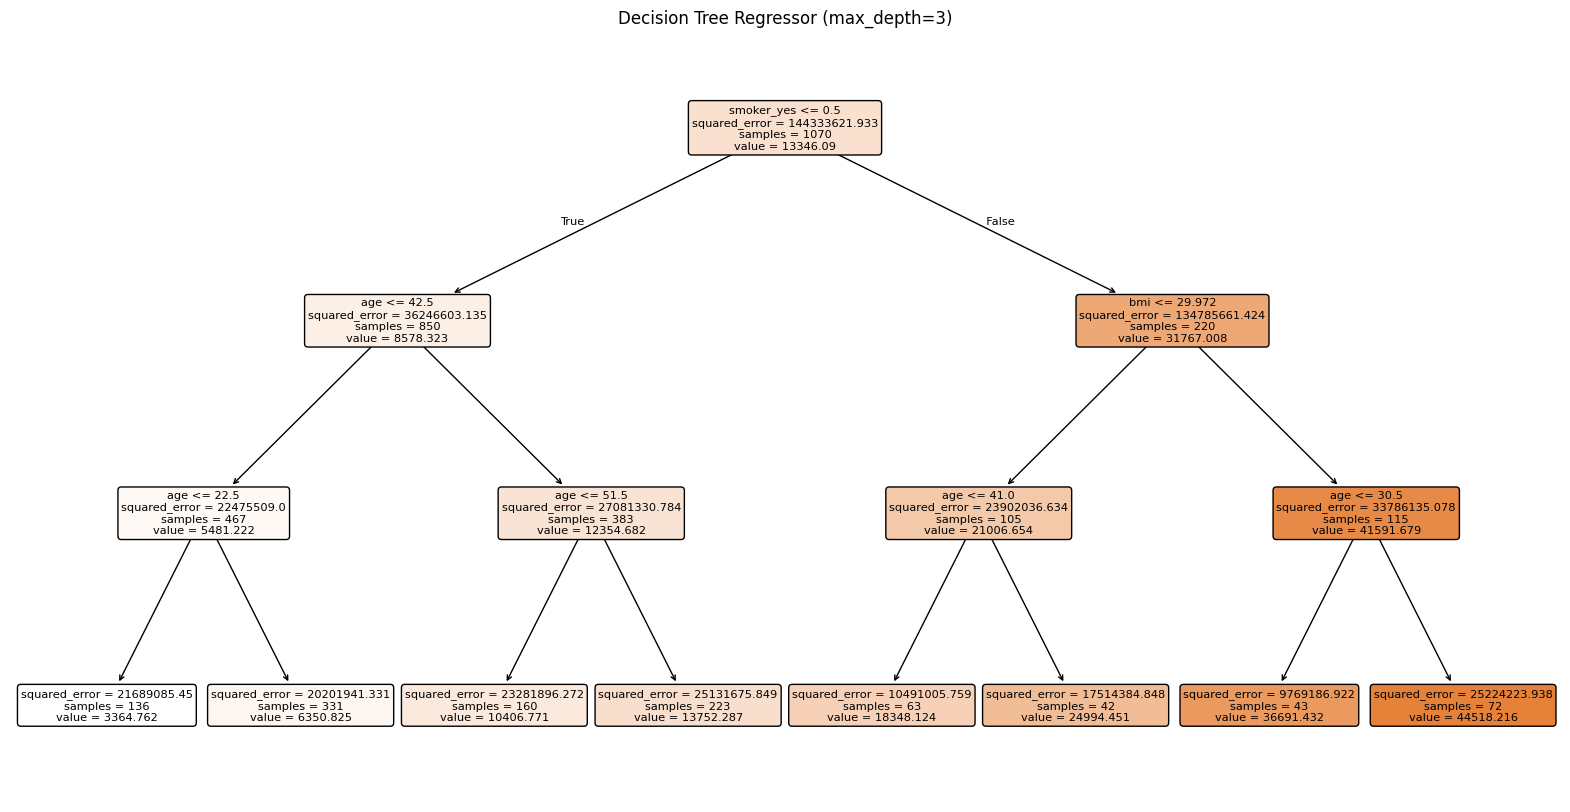

Decision Tree - MSE: 22812669.852340844
Decision Tree - R²: 0.8530572866320028


In [7]:
# Scrivi qui il tuo codice
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Caricamento del dataset (se già caricato puoi saltare questa parte)
df = pd.read_csv("2025-04-11-dataset-insurancecsv-new.csv")
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# 2. Encoding delle variabili categoriche
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Separazione feature e target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Albero di regressione con profondità massima arbitraria (es. max_depth=3)
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# 6. Visualizzazione dell'albero
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor (max_depth=3)")
plt.show()

# 7. Valutazione del modello
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - MSE:", mse_tree)
print("Decision Tree - R²:", r2_tree)


**Scrivi qui le tue risposte**

1. Come cambia l’errore al variare della profondità dell’albero?
All’aumentare della profondità dell’albero:

L’errore sul training set diminuisce: l’albero riesce a segmentare sempre più precisamente i dati, arrivando (nel limite) a predire perfettamente ogni osservazione.

L’errore sul test set inizialmente diminuisce, ma poi tende ad aumentare: oltre una certa profondità, il modello inizia a memorizzare il rumore del training set, perdendo capacità di generalizzazione. Questo fenomeno è noto come overfitting.

In sintesi:

Profondità bassa → modello troppo semplice, underfitting

Profondità ottimale → generalizzazione buona

Profondità eccessiva → modello troppo complesso, overfitting

2. Quando ha senso usare un albero rispetto a una regressione lineare?
Usare un albero è utile quando:

La relazione tra le variabili non è lineare e non può essere facilmente trasformata.

Sono presenti interazioni complesse tra le variabili.

Il dataset contiene valori categorici o dati eterogenei.

Si desidera un modello interpretabile visivamente, ad esempio per spiegazioni a utenti non tecnici.

Invece, la regressione lineare è più adatta quando:

La relazione tra feature e target è approssimativamente lineare.

Il numero di feature è elevato ma i dati sono ben distribuiti.

Si desiderano modelli semplici, stabili e generalizzabili con pochi parametri.

3. Quali sono i vantaggi e gli svantaggi dell’interpolazione dei dati con un albero?
Vantaggi:

Flessibilità: gli alberi non assumono una forma predefinita della relazione tra input e output.

Adattabilità locale: suddividono lo spazio dei dati in regioni che possono essere molto diverse tra loro.

Robustezza a outlier o dati non normalizzati.

Interpretabilità: l’albero può essere visualizzato e interpretato anche da persone non tecniche.

Svantaggi:

Overfitting: alberi profondi tendono a memorizzare i dati di training, specialmente se non potati o regolarizzati.

Discontinuità: le previsioni sono a "gradini", non continue. Questo può essere poco realistico per certi fenomeni.

Instabilità: piccole variazioni nei dati possono produrre grandi cambiamenti nella struttura dell’albero (a meno di usare metodi ensemble come Random Forest).

Minor efficienza predittiva su relazioni chiaramente lineari, dove una regressione semplice è più efficace e robusta.



---
# Traccia 3 - Random Forest: Robustezza e Overfitting
## Obiettivo:
Utilizzare un Random Forest Regressor per migliorare la stabilità e ridurre l’overfitting.

## To-do:
1. Applicare un modello Random Forest con un numero predefinito di alberi.
2. Confrontare i risultati con un singolo Decision Tree.
3. Valutare il modello usando MSE e R².
4. Analizzare l'importanza delle feature con feature_importances_.

## Domande di Riflessione:
1. Perché Random Forest riduce l’overfitting rispetto a un singolo Decision Tree?
2. Come cambia l’errore aumentando il numero di alberi nella foresta?
3. Quali feature risultano più importanti? Perché?

Random Forest - MSE: 20942520.922619622
Random Forest - R²: 0.8651034329144947
Decision Tree - MSE: 42446908.010150984
Decision Tree - R²: 0.7265877305258355


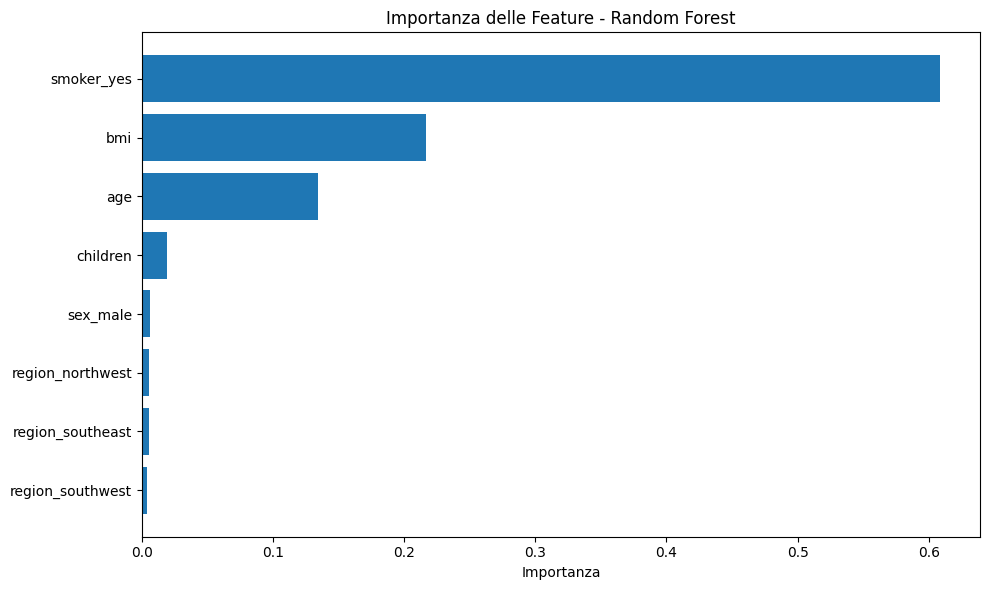

In [8]:
# Scrivi qui il tuo codice
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Caricamento del dataset
df = pd.read_csv("2025-04-11-dataset-insurancecsv-new.csv")
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# 2. One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Separazione tra feature e target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 4. Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modello Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Predizione e valutazione
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf)
print("Random Forest - R²:", r2_rf)

# 7. Confronto con un singolo Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - R²:", r2_dt)

# 8. Importanza delle feature
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# 9. Visualizzazione dell'importanza delle feature
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Importanza delle Feature - Random Forest')
plt.xlabel('Importanza')
plt.tight_layout()
plt.show()


**Scrivi qui le tue risposte**

1. Perché Random Forest riduce l’overfitting rispetto a un singolo Decision Tree?
Un singolo Decision Tree tende a memorizzare i dati di training, specialmente se non si pone un limite alla profondità: questo porta facilmente all’overfitting.

La Random Forest, invece, riduce l’overfitting grazie a due meccanismi:

Bagging (Bootstrap Aggregating): ogni albero è addestrato su un campione casuale (con ripetizione) del dataset → questo riduce la varianza del modello.

Randomizzazione delle feature: ad ogni split, l’algoritmo sceglie il miglior attributo tra un sottoinsieme casuale di feature → questo rende gli alberi meno correlati tra loro.

Combinando molti alberi deboli ma diversi, la Random Forest costruisce un modello robusto, stabile e con minore rischio di overfitting, soprattutto se confrontato con un singolo albero profondo.

2. Come cambia l’errore aumentando il numero di alberi nella foresta?
All’aumentare del numero di alberi (n_estimators):

L’errore sul test set tende a diminuire e poi si stabilizza.

L’errore sul training set è sempre molto basso, perché ogni singolo albero può adattarsi bene al suo sottoinsieme di dati.

In pratica:

Con pochi alberi (10-50), la Random Forest è già efficace.

Aumentare oltre 100 alberi di solito porta benefici marginali, ma può migliorare la stabilità delle predizioni.

Dopo una certa soglia (es. 200-300 alberi), l’errore non migliora significativamente, ma i tempi di calcolo aumentano.

Conclusione: è utile aumentare il numero di alberi fino a quando l’errore di generalizzazione si stabilizza.

3. Quali feature risultano più importanti? Perché?
L’importanza delle feature nella Random Forest si basa su quanto ciascuna variabile contribuisce a ridurre l’impurità (varianza) nei nodi degli alberi.

Nel dataset delle spese assicurative, tipicamente le feature più importanti risultano essere:

smoker_yes: fumare ha un impatto diretto molto forte sui costi assicurativi.

age: l’età è un predittore importante perché i rischi aumentano con l’invecchiamento.

bmi: l’indice di massa corporea è associato a problematiche sanitarie, quindi può influire sui costi.

children: il numero di figli può influenzare il premio assicurativo, anche se in misura minore.

region o sex_male: di solito hanno importanza più bassa, a meno che nel dataset non ci siano squilibri.

La Random Forest calcola queste importanze aggregando l’effetto cumulativo di ogni feature su tutti gli alberi.